In [1]:
import pandas as pd
%pylab inline
from sklearn import neighbors,model_selection,metrics,svm,preprocessing

Populating the interactive namespace from numpy and matplotlib


In [2]:
raw_data=pd.read_csv("Dataset_feuilles_1.csv")

In [3]:
raw_data.head(10)

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.00000,0.000000,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.00000,0.000000,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.00000,0.000000,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.00000,0.000000,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.031250
5,8,Magnolia_Salicifolia,0.070312,0.093750,0.033203,0.001953,0.000000,0.152340,0.007812,0.0,...,0.145510,0.000000,0.041992,0.000000,0.005859,0.00000,0.000000,0.000000,0.001953,0.013672
6,10,Quercus_Canariensis,0.021484,0.031250,0.017578,0.009766,0.001953,0.042969,0.039062,0.0,...,0.085938,0.000000,0.040039,0.000000,0.009766,0.00000,0.000000,0.000000,0.039062,0.003906
7,11,Quercus_Rubra,0.000000,0.000000,0.037109,0.050781,0.003906,0.000000,0.003906,0.0,...,0.038086,0.025391,0.009766,0.002930,0.021484,0.00000,0.037109,0.006836,0.002930,0.036133
8,14,Quercus_Brantii,0.005859,0.001953,0.033203,0.015625,0.001953,0.000000,0.023438,0.0,...,0.000000,0.000000,0.008789,0.000000,0.017578,0.00000,0.000000,0.000977,0.033203,0.074219
9,15,Salix_Fragilis,0.000000,0.000000,0.009766,0.037109,0.072266,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.070312,0.013672,0.19238,0.000000,0.074219,0.000000,0.000000


In [4]:
raw_data.shape

(990, 194)

In [5]:
raw_data.describe(include="all")

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
count,990.000000,990,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,...,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
unique,NaN,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Acer_Circinatum,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,799.595960,NaN,0.017412,0.028539,0.031988,0.023280,0.014264,0.038579,0.019202,0.001083,...,0.036501,0.005024,0.015944,0.011586,0.016108,0.014017,0.002688,0.020291,0.008989,0.019420
std,452.477568,NaN,0.019739,0.038855,0.025847,0.028411,0.018390,0.052030,0.017511,0.002743,...,0.063403,0.019321,0.023214,0.025040,0.015335,0.060151,0.011415,0.039040,0.013791,0.022768
min,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,415.250000,NaN,0.001953,0.001953,0.013672,0.005859,0.001953,0.000000,0.005859,0.000000,...,0.000000,0.000000,0.000977,0.000000,0.004883,0.000000,0.000000,0.000000,0.000000,0.000977
50%,802.500000,NaN,0.009766,0.011719,0.025391,0.013672,0.007812,0.015625,0.015625,0.000000,...,0.004883,0.000000,0.005859,0.000977,0.012695,0.000000,0.000000,0.003906,0.002930,0.011719
75%,1195.500000,NaN,0.025391,0.041016,0.044922,0.029297,0.017578,0.056153,0.029297,0.000000,...,0.043701,0.000000,0.022217,0.009766,0.021484,0.000000,0.000000,0.023438,0.012695,0.029297


In [6]:
Xtrain=raw_data.iloc[:,2:]
ytrain=raw_data.iloc[:,1]

In [10]:
raw_test=pd.read_csv("test.csv")

In [11]:
raw_test.head(10)

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,4,0.019531,0.009766,0.078125,0.011719,0.003906,0.015625,0.005859,0.0,0.005859,...,0.006836,0.000000,0.015625,0.000977,0.015625,0.000000,0.0,0.000000,0.003906,0.053711
1,7,0.007812,0.005859,0.064453,0.009766,0.003906,0.013672,0.007812,0.0,0.033203,...,0.000000,0.000000,0.006836,0.001953,0.013672,0.000000,0.0,0.000977,0.037109,0.044922
2,9,0.000000,0.000000,0.001953,0.021484,0.041016,0.000000,0.023438,0.0,0.011719,...,0.128910,0.000000,0.000977,0.000000,0.000000,0.000000,0.0,0.015625,0.000000,0.000000
3,12,0.000000,0.000000,0.009766,0.011719,0.017578,0.000000,0.003906,0.0,0.003906,...,0.012695,0.015625,0.002930,0.036133,0.013672,0.000000,0.0,0.089844,0.000000,0.008789
4,13,0.001953,0.000000,0.015625,0.009766,0.039062,0.000000,0.009766,0.0,0.005859,...,0.000000,0.042969,0.016602,0.010742,0.041016,0.000000,0.0,0.007812,0.009766,0.007812
5,16,0.021484,0.033203,0.021484,0.009766,0.015625,0.035156,0.039062,0.0,0.003906,...,0.000000,0.000000,0.000000,0.000977,0.049805,0.000000,0.0,0.027344,0.000000,0.021484
6,19,0.015625,0.025391,0.046875,0.009766,0.005859,0.027344,0.042969,0.0,0.000000,...,0.001953,0.000000,0.000000,0.004883,0.030273,0.000000,0.0,0.000977,0.000000,0.024414
7,23,0.007812,0.031250,0.011719,0.050781,0.000000,0.117190,0.003906,0.0,0.011719,...,0.047852,0.000000,0.030273,0.000000,0.011719,0.000000,0.0,0.003906,0.002930,0.048828
8,24,0.003906,0.007812,0.074219,0.017578,0.015625,0.003906,0.011719,0.0,0.009766,...,0.102540,0.000000,0.023438,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.008789
9,28,0.000000,0.000000,0.005859,0.021484,0.054688,0.000000,0.015625,0.0,0.011719,...,0.195310,0.039062,0.003906,0.007812,0.013672,0.001953,0.0,0.029297,0.000000,0.007812


In [12]:
raw_test.shape

(594, 193)

In [13]:
raw_test.describe(include="all")

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
count,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,...,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000
mean,780.673401,0.017562,0.028425,0.031858,0.022556,0.014527,0.037497,0.019222,0.001085,0.007092,...,0.035291,0.005923,0.015033,0.011762,0.015881,0.011217,0.002617,0.019975,0.009389,0.020970
std,465.646977,0.019585,0.038351,0.025719,0.028797,0.018029,0.051372,0.017122,0.002697,0.009515,...,0.064482,0.026934,0.022318,0.024771,0.014898,0.052530,0.011204,0.034704,0.013457,0.023407
min,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,368.500000,0.001953,0.001953,0.013672,0.005859,0.001953,0.000000,0.005859,0.000000,0.001953,...,0.000000,0.000000,0.000977,0.000000,0.004883,0.000000,0.000000,0.000000,0.000000,0.000977
50%,774.000000,0.009766,0.010743,0.023438,0.013672,0.007812,0.013672,0.015625,0.000000,0.005859,...,0.003906,0.000000,0.005859,0.001953,0.012695,0.000000,0.000000,0.003418,0.002930,0.013184
75%,1184.500000,0.028809,0.041016,0.042969,0.027344,0.019531,0.056641,0.029297,0.000000,0.007812,...,0.038086,0.000000,0.019531,0.010498,0.022461,0.000000,0.000000,0.022461,0.014648,0.032227
max,1583.000000,0.085938,0.189450,0.167970,0.164060,0.093750,0.271480,0.087891,0.021484,0.083984,...,0.353520,0.441410,0.153320,0.177730,0.083984,0.606450,0.123050,0.247070,0.086914,0.149410


In [14]:
Xtest=raw_test.iloc[:,1:]

In [15]:
Xtest.shape

(594, 192)

## Baseline: K-NN

In [55]:
params={"n_neighbors":range(1,15)}

clf=model_selection.GridSearchCV(neighbors.KNeighborsClassifier(),params,cv=10,n_jobs=-1)
clf.fit(Xtrain,ytrain)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

Best parameters set found on development set:

{'n_neighbors': 1}

Grid scores on development set:

0.914 (+/-0.057) for {'n_neighbors': 1}
0.885 (+/-0.061) for {'n_neighbors': 2}
0.892 (+/-0.078) for {'n_neighbors': 3}
0.879 (+/-0.084) for {'n_neighbors': 4}
0.872 (+/-0.074) for {'n_neighbors': 5}
0.864 (+/-0.081) for {'n_neighbors': 6}
0.855 (+/-0.082) for {'n_neighbors': 7}
0.847 (+/-0.088) for {'n_neighbors': 8}
0.841 (+/-0.067) for {'n_neighbors': 9}
0.832 (+/-0.076) for {'n_neighbors': 10}
0.828 (+/-0.048) for {'n_neighbors': 11}
0.804 (+/-0.036) for {'n_neighbors': 12}
0.793 (+/-0.050) for {'n_neighbors': 13}
0.779 (+/-0.068) for {'n_neighbors': 14}



NameError: name 'means' is not defined

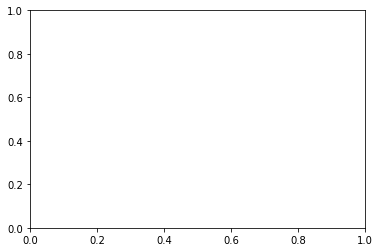

In [2]:
ax = plt.gca()

ax.plot(range(1,15), means)
plt.xlabel('n_neighbors')
plt.ylabel('mean_test_score')
plt.title('Mean test scores as a function of the n_neighbors parameter')
plt.axis('tight')
plt.show()

### critique
On remarque qu'en augmentant le nombre de proches voisins à considérer, la moyenne des erreurs de test à tendance à augmenter. Cependant plus le nombre de proches voisins est faible et moins le modèle sera robuste et se généralisera bien.
Avec les informations dont nous disposons il semble prudent de choisir une valeur de K intermédiaire comme K=3.

## Linear SVM 

In [51]:
params={"C":np.logspace(-2,10,13)}

clf = model_selection.GridSearchCV(svm.LinearSVC(), params, cv=10,n_jobs=-1)
clf.fit(Xtrain, ytrain)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

Best parameters set found on development set:

{'C': 1000.0}

Grid scores on development set:

0.575 (+/-0.042) for {'C': 0.01}
0.671 (+/-0.054) for {'C': 0.1}
0.867 (+/-0.042) for {'C': 1.0}
0.947 (+/-0.037) for {'C': 10.0}
0.954 (+/-0.037) for {'C': 100.0}
0.955 (+/-0.036) for {'C': 1000.0}
0.955 (+/-0.037) for {'C': 10000.0}
0.952 (+/-0.045) for {'C': 100000.0}
0.949 (+/-0.044) for {'C': 1000000.0}
0.952 (+/-0.040) for {'C': 10000000.0}
0.953 (+/-0.041) for {'C': 100000000.0}
0.953 (+/-0.036) for {'C': 1000000000.0}
0.953 (+/-0.041) for {'C': 10000000000.0}



C:\Users\jdouet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


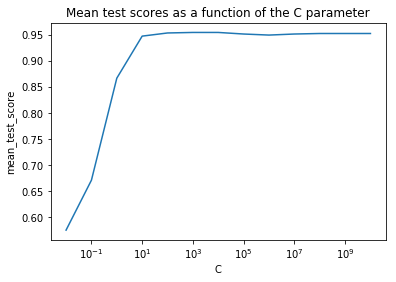

In [53]:
ax = plt.gca()

ax.plot(np.logspace(-2,10,13), means)
ax.set_xscale('log')
plt.xlabel('C')
plt.ylabel('mean_test_score')
plt.title('Mean test scores as a function of the C parameter')
plt.axis('tight')
plt.show()

### critique
On remarque qu'en augmentant la valeur de C, la moyenne des erreurs de test à tendance à diminuer vivement jusqu'à C=10 environ. Puis l'erreur se stabilise et ne diminue plus en augmentant C. Sachant que plus C est faible, meilleure est la capacité du modèle à se généraliser, nous recommandons de choisir C=10 ou C=100

## Final model

Au final on choisit un classifieur SVM linéaire car il permet d'après notre étude de mieux classer en moyenne environ 5% des espèces d'arbres de notre jeu d'entrainement en comparaison avec un classifieur 3-NN.

In [ ]:
#faire une stratification! avt grid search model_selection.StratifiedKFold
#faire grid search plus exhaustive C,l1l2, hinge ou autre, dual